# Acc 2 Stock Performance Tracker

## Setup

In [23]:
import contextlib
import pandas as pd
import draw_utils, process_utils, const

In [24]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [25]:
acc_name = const.ACC2_NAME
user_name_l = const.ACC_USER_DICT[acc_name]
compare_index = const.VNI_NAME

## Prepare Dataframe

In [26]:
log_df, cf_df = process_utils.prepare_log_df_cf_df()

In [27]:
user_df = process_utils.get_user_df(
    log_df,
    cf_df,
    acc_name=acc_name,
    user_name_l=user_name_l,
    index_name=compare_index,
)

/Users/kaestrl/projects/python/stock_tracker/process_utils.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_cf_df[f"{acc_name}_cf"] = acc_cf_df.sum(axis=1)


In [28]:
# user_df.tail(10)

## Charts

### NAV

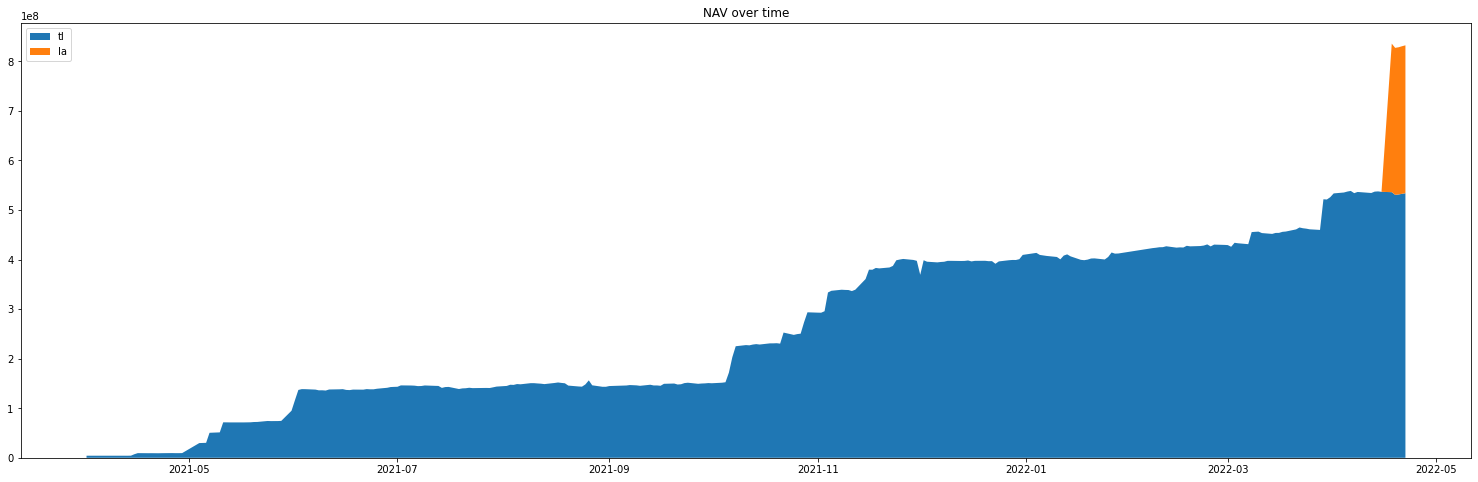

In [29]:
y_list = [user_df[user_name] for user_name in user_name_l]

draw_utils.plot_nav_stackplot(
    x=user_df.index,  # type: ignore
    y=y_list,
    labels=user_name_l,
)


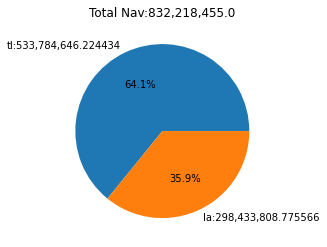

In [30]:
nav_l = [user_df[user_name].iloc[-1] for user_name in user_name_l]  # type: ignore
label_l = [f"{user_name}:{nav:,}" for user_name, nav in zip(user_name_l, nav_l)]
draw_utils.plot_nav_pie(nav_l, label_l=label_l)

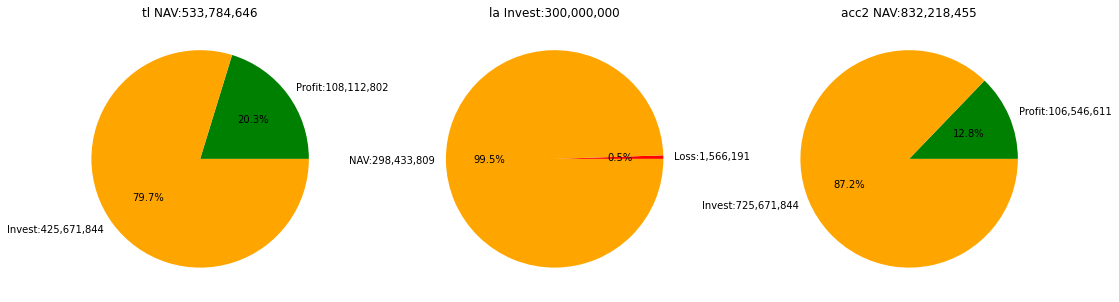

In [31]:
profit_invest_list: list[tuple[str, float, float]] = []
for name in user_name_l + [acc_name]:
    nav = user_df[name].iloc[-1]
    invest = -user_df[f"{name}_cf"].sum()
    profit = nav - invest
    profit_invest_list.append((name, profit, invest))
draw_utils.plot_profit_invest_pies(profit_invest_list)

### Recent 

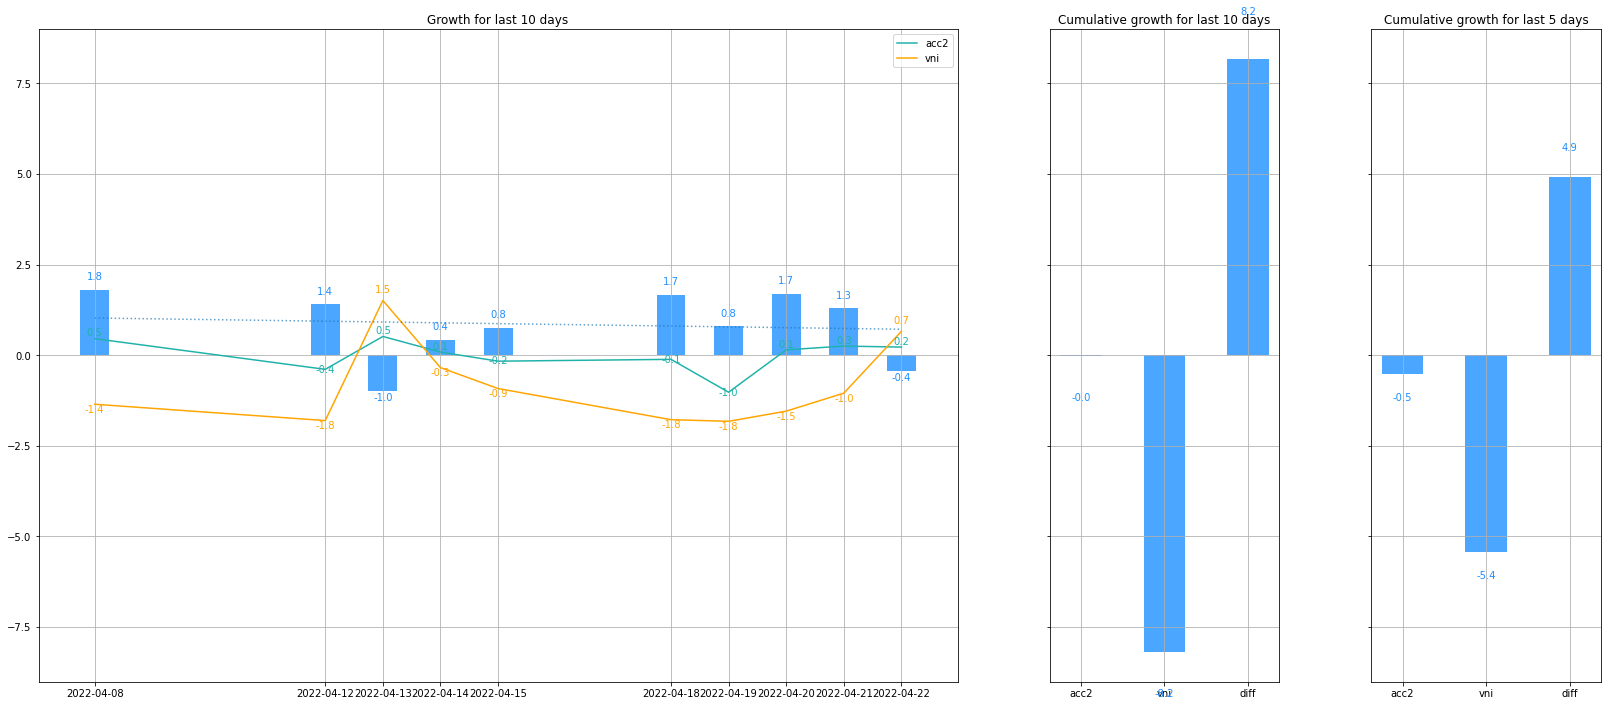

In [32]:
draw_utils.plot_recent_growth(
    user_df,
    num_days=10,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


In [33]:
user_df.tail(10)

,vni,vni_diff,acc2,acc2_diff,tl_cf,la_cf,acc2_cf,day_start,tl_day_start,tl_share,tl_diff,tl,la_day_start,la_share,la_diff,la,acc2_diff_p,acc2_aux_diff_p,tl_diff_p,tl_aux_diff_p,la_diff_p,la_aux_diff_p,vni_diff_p,vni_aux_diff_p
date,,,,,,,,,,,,,,,,,,,,,,,,
2022-04-08,1482.00,-20.35,536358112,2434146.0,0.0,0.0,0.0,533923966.0,5.339240e+08,1.0000,2.434146e+06,5.363581e+08,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.004559,1.004559,0.004559,1.004559,NaN,NaN,-0.013545,0.986455
2022-04-12,1455.25,-26.75,534260028,-2098084.0,0.0,0.0,0.0,536358112.0,5.363581e+08,1.0000,-2.098084e+06,5.342600e+08,0.000000e+00,0.0000,-0.000000e+00,0.000000e+00,-0.003912,0.996088,-0.003912,0.996088,NaN,NaN,-0.018050,0.981950
2022-04-13,1477.20,21.95,537017705,2757677.0,0.0,0.0,0.0,534260028.0,5.342600e+08,1.0000,2.757677e+06,5.370177e+08,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.005162,1.005162,0.005162,1.005162,NaN,NaN,0.015083,1.015083
2022-04-14,1472.12,-5.08,537477167,459462.0,0.0,0.0,0.0,537017705.0,5.370177e+08,1.0000,4.594620e+05,5.374772e+08,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000856,1.000856,0.000856,1.000856,NaN,NaN,-0.003439,0.996561
2022-04-15,1458.56,-13.56,536585967,-891200.0,0.0,0.0,0.0,537477167.0,5.374772e+08,1.0000,-8.912000e+05,5.365860e+08,0.000000e+00,0.0000,-0.000000e+00,0.000000e+00,-0.001658,0.998342,-0.001658,0.998342,NaN,NaN,-0.009211,0.990789
2022-04-18,1432.60,-25.96,835621795,-964172.0,0.0,-300000000.0,-300000000.0,836585967.0,5.365860e+08,0.6414,-6.184196e+05,5.359675e+08,3.000000e+08,0.3586,-3.457524e+05,2.996542e+08,-0.001153,0.998847,-0.001153,0.998847,-0.001153,0.998847,-0.017798,0.982202
2022-04-19,1406.45,-26.15,827075354,-8546441.0,0.0,0.0,0.0,835621795.0,5.359675e+08,0.6414,-5.481684e+06,5.304859e+08,2.996542e+08,0.3586,-3.064757e+06,2.965895e+08,-0.010228,0.989772,-0.010228,0.989772,-0.010228,0.989772,-0.018254,0.981746
2022-04-20,1384.72,-21.73,828288112,1212758.0,0.0,0.0,0.0,827075354.0,5.304859e+08,0.6414,7.778626e+05,5.312637e+08,2.965895e+08,0.3586,4.348954e+05,2.970244e+08,0.001466,1.001466,0.001466,1.001466,0.001466,1.001466,-0.015450,0.984550
2022-04-21,1370.21,-14.51,830367127,2079015.0,0.0,0.0,0.0,828288112.0,5.312637e+08,0.6414,1.333480e+06,5.325972e+08,2.970244e+08,0.3586,7.455355e+05,2.977699e+08,0.002510,1.002510,0.002510,1.002510,0.002510,1.002510,-0.010479,0.989521


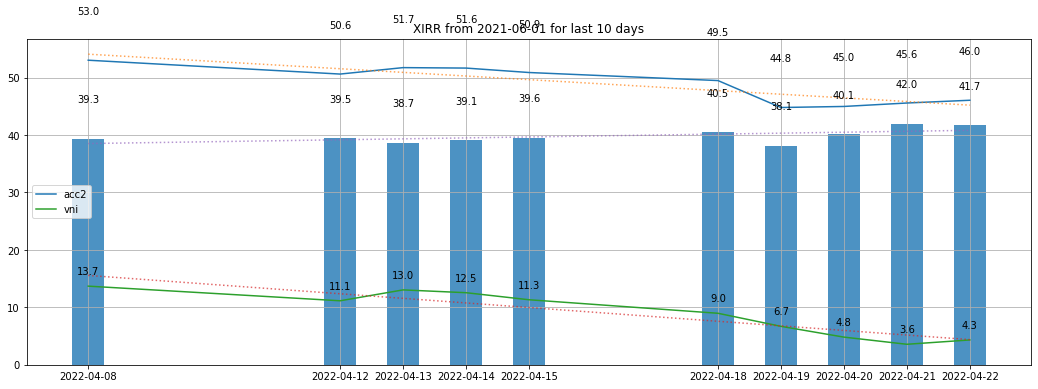

In [34]:
draw_utils.plot_recent_xirr(
    log_df=user_df,
    cf_df=cf_df,
    num_days=10,
    anchor_date="2021-06-01",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)

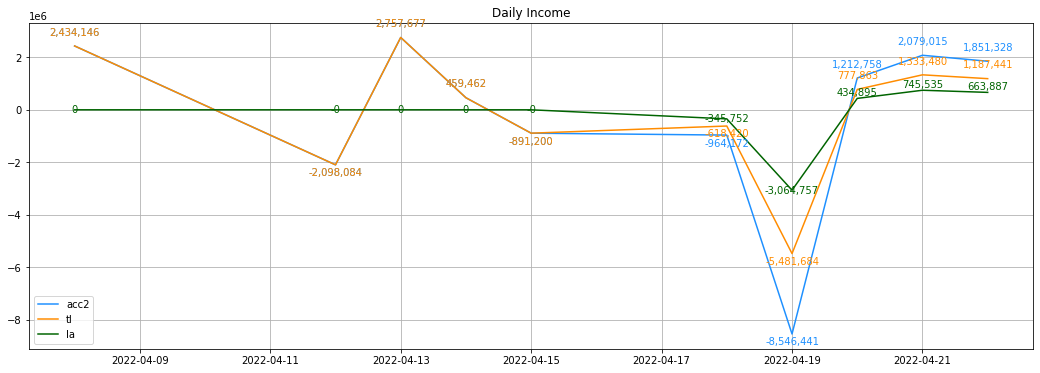

In [35]:
draw_utils.plot_recent_income(
    daily_df=user_df,
    num_days=10,
    name_l=[acc_name] + user_name_l,
    color_l=const.COLOR_LIST[: len(const.ALL_ACC_NAME_L)],
)

### Diff distribution

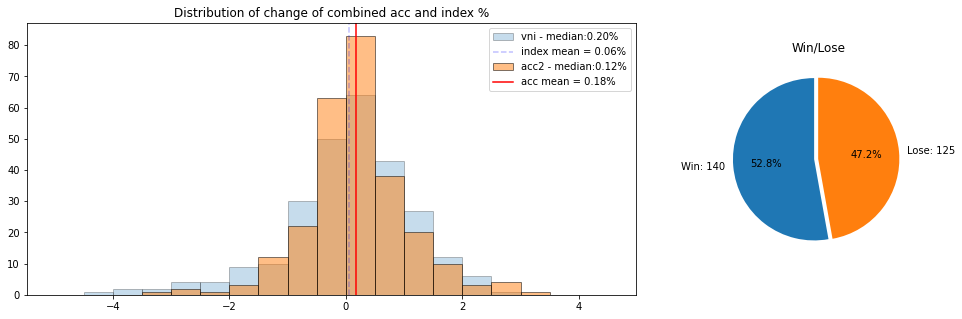

In [36]:
draw_utils.plot_daily_diff_p_distribution(
    user_df,
    acc_name=acc_name,
    index_name=compare_index,
)

### Growth XIRR

In [37]:
anchor_date = "2022-1-1"

growth_xirr_df = process_utils.get_overall_growth_xirr_df(
    user_df,
    cf_df,
    anchor_date=anchor_date,
    acc_name_l=[acc_name],
    index_name_l=[compare_index] ,
)

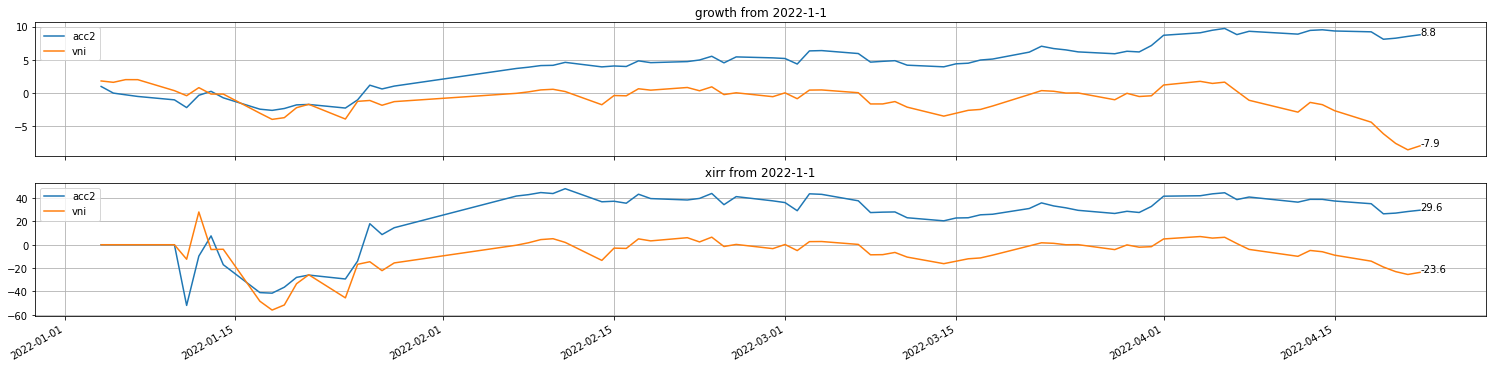

In [38]:
draw_utils.plot_growth_xirr_over_time(
    growth_xirr_df,
    anchor_date=anchor_date,
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
)


### Periodic

In [39]:
user_df = process_utils.add_period_cols(user_df)

#### Weekly

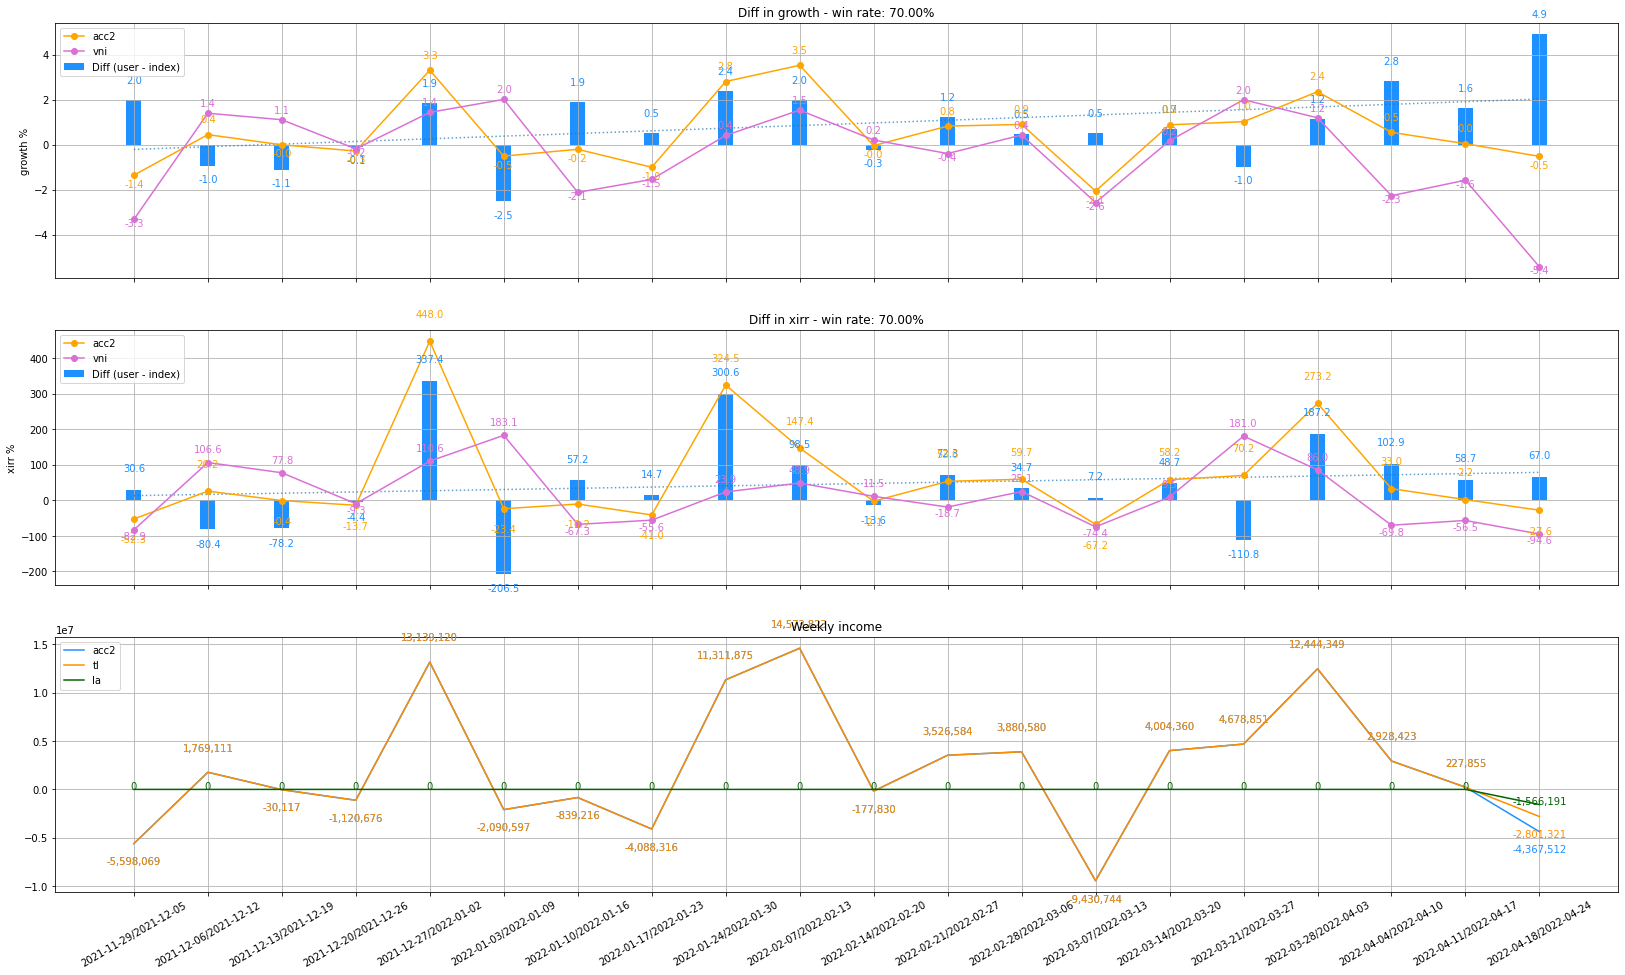

In [40]:
weekly_df = process_utils.get_period_df(
    period_symbol="W",
    df=user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)
# Not enough space to plot every week
weekly_df = process_utils.filter_latest_x_rows(df=weekly_df, row_num=20)  # type: ignore

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=weekly_df,
    period_name="Weekly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Monthly

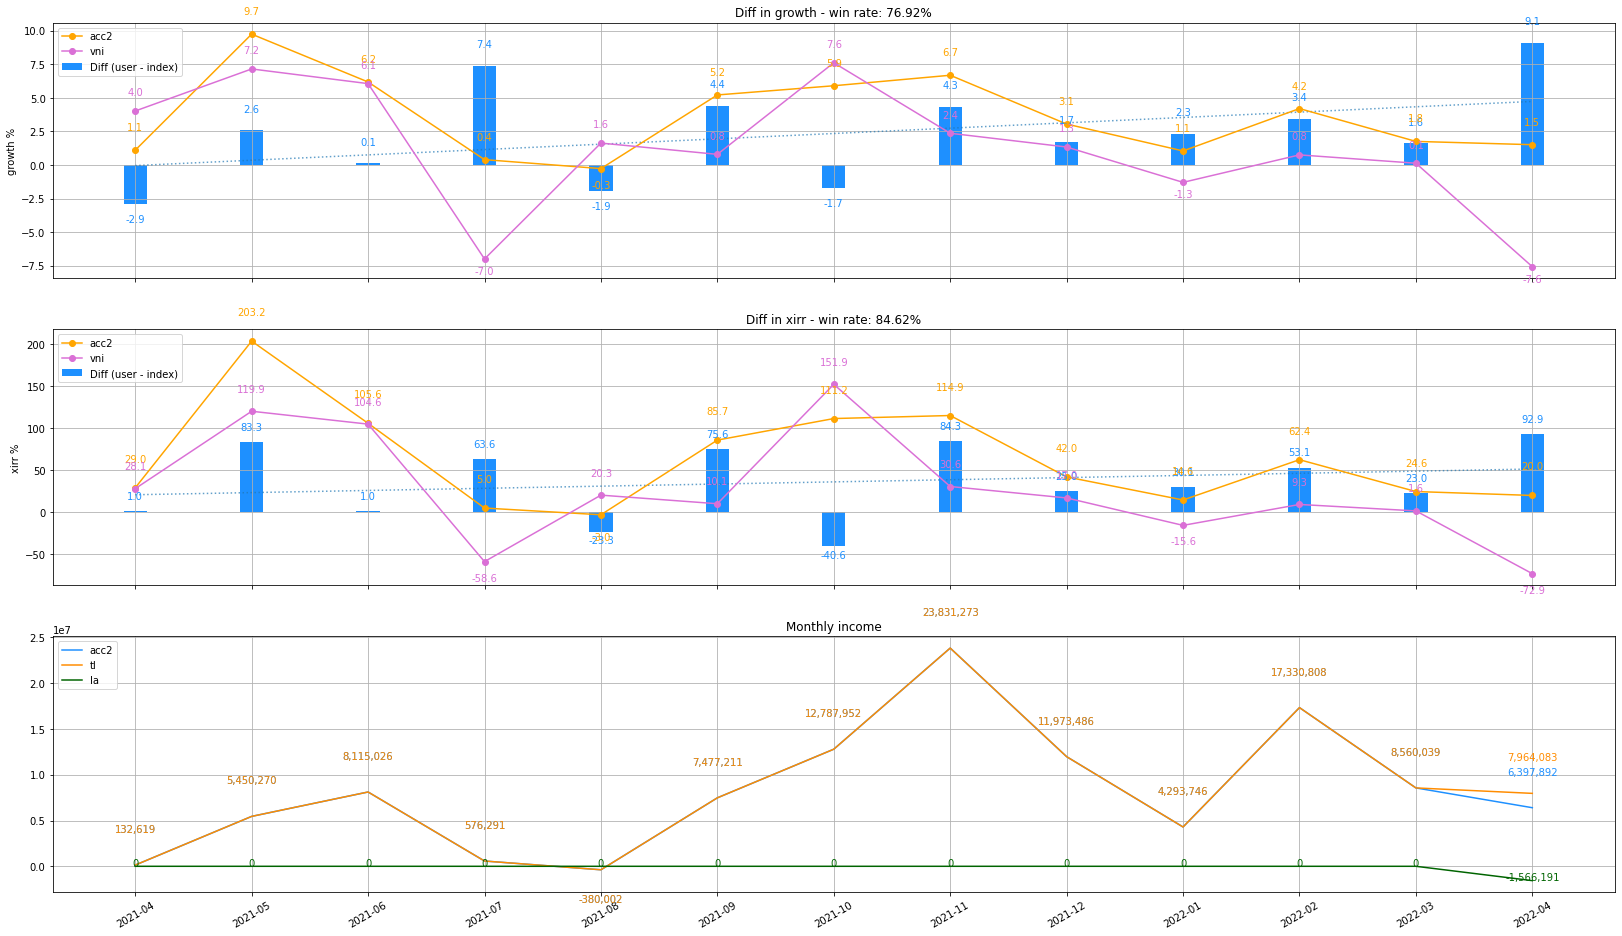

In [41]:
monthly_df = process_utils.get_period_df(
    period_symbol="M",
    df=user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020-12
    monthly_df.drop(["2020-12"], inplace=True)
    
draw_utils.plot_period_growth_xirr(
    growth_xirr_df=monthly_df,
    period_name="Monthly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)

#### Quarterly

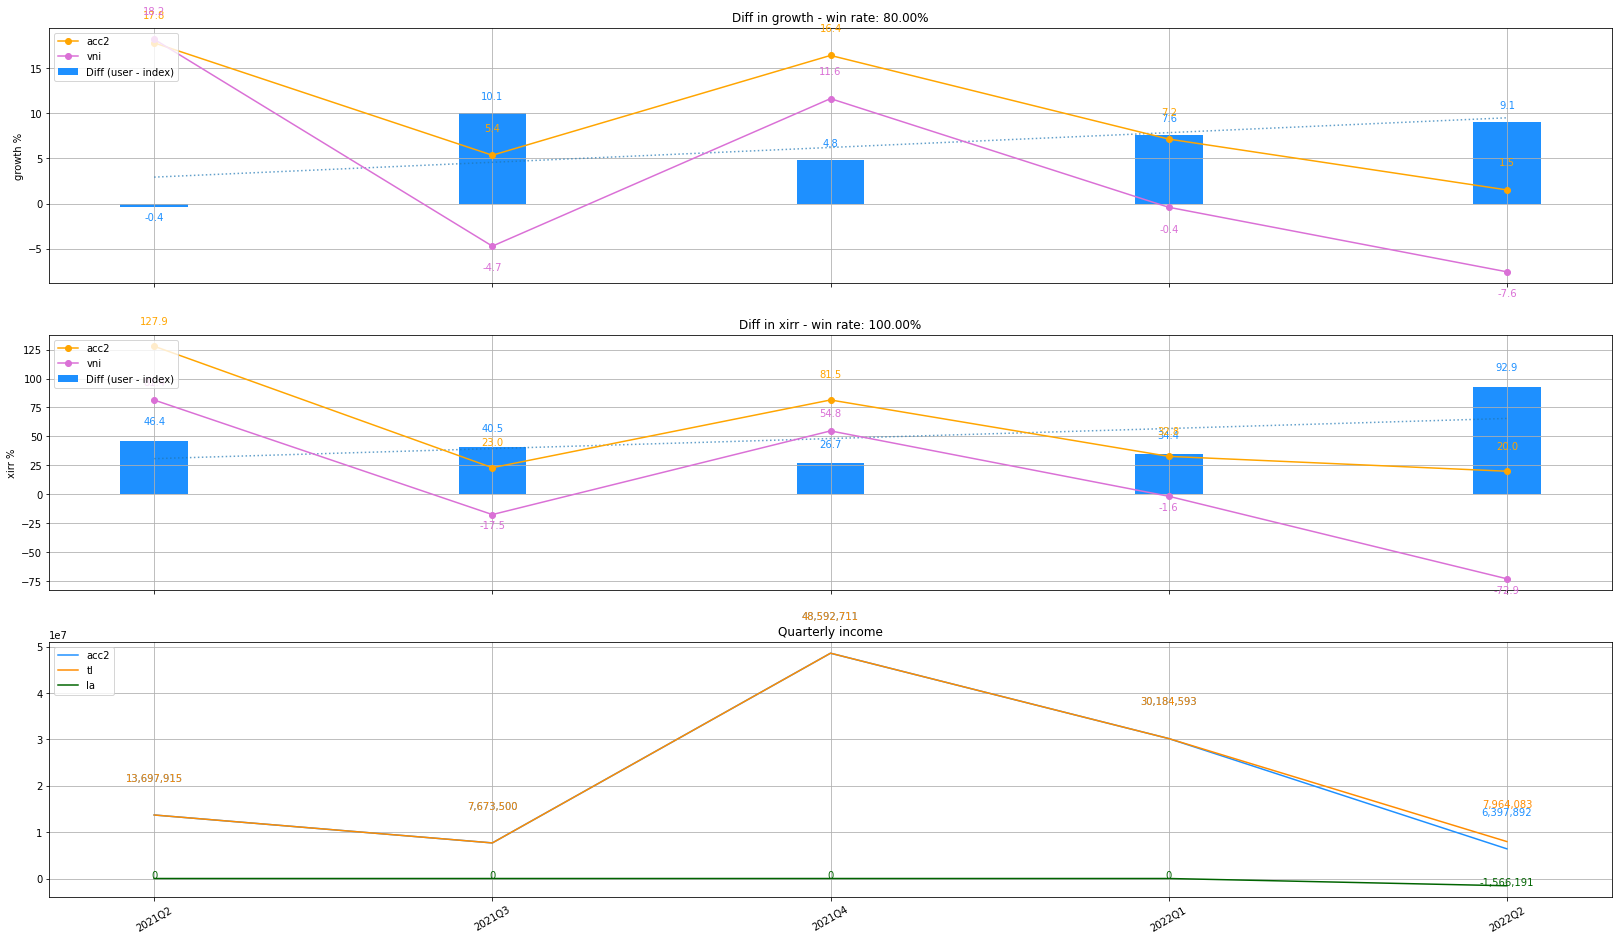

In [43]:
quaterly_df = process_utils.get_period_df(
    period_symbol="Q",
    df=user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020Q4
    quaterly_df.drop(["2020Q4"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=quaterly_df,
    period_name="Quarterly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)


#### Yearly

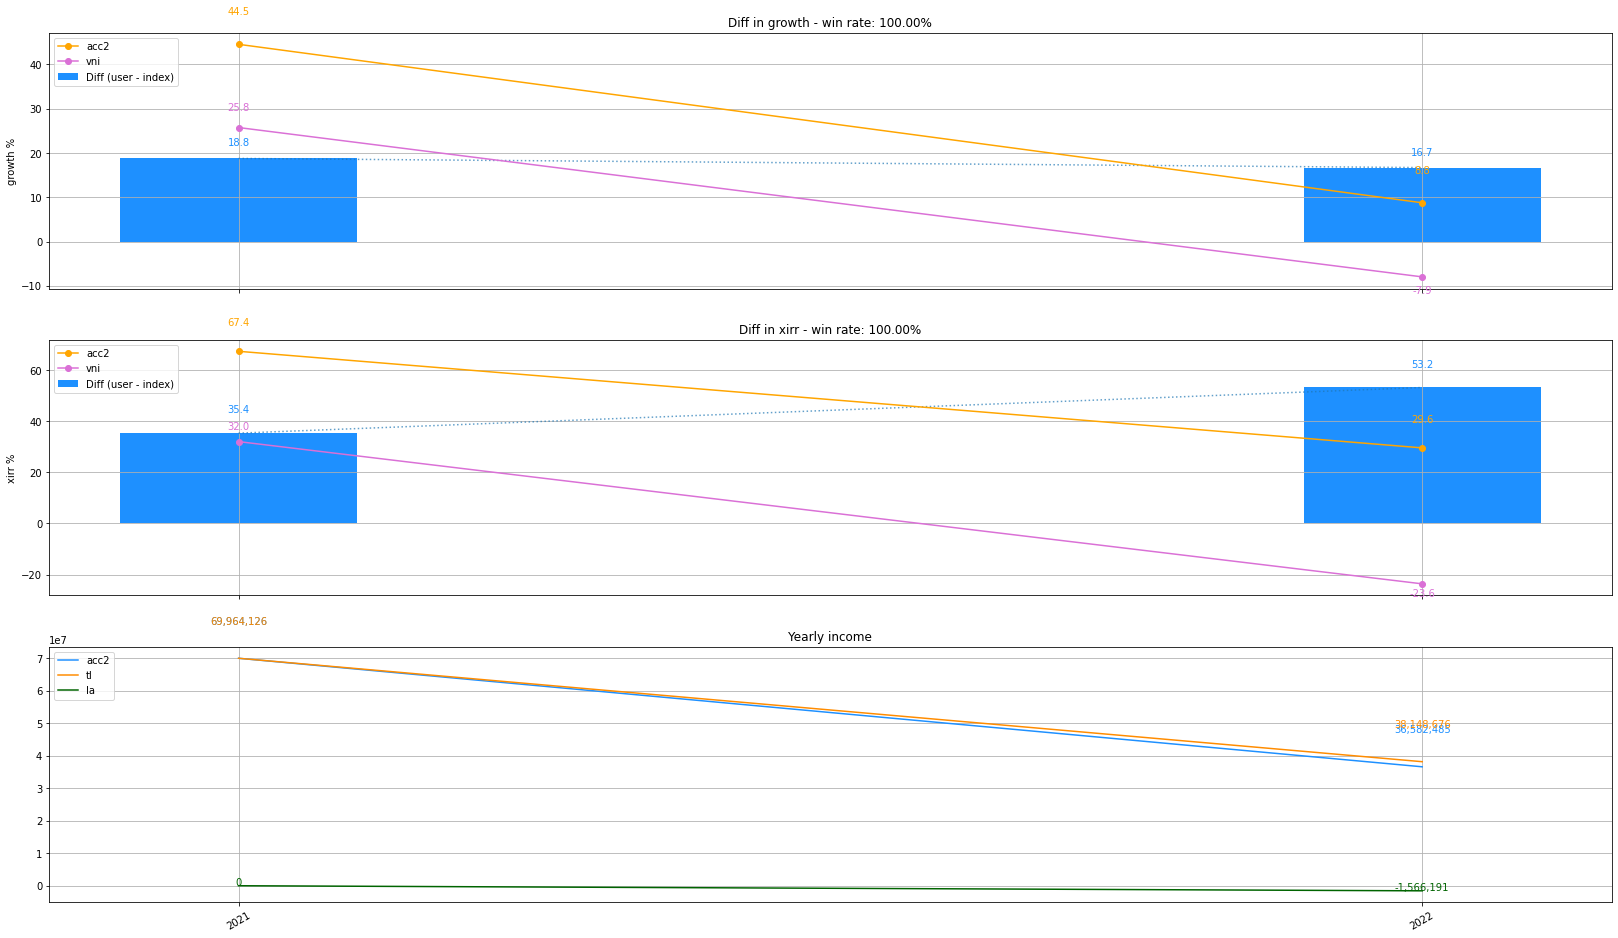

In [44]:
yearly_df = process_utils.get_period_df(
    period_symbol="Y",
    df=user_df,
    cashflow_df=cf_df,
    all_acc_name_l=[acc_name] + user_name_l,
    index_name_combined_l=[compare_index],
)

with contextlib.suppress(KeyError):
    # Insufficient data for 2020
    yearly_df.drop(["2020"], inplace=True)

draw_utils.plot_period_growth_xirr(
    growth_xirr_df=yearly_df,
    period_name="Yearly",
    main_acc_name=acc_name,
    main_index_name=compare_index,
    secondary_acc_name_l=[],
    secondary_index_name_l=[],
    income_acc_name_l=[acc_name] + user_name_l,
)
